In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dropout, Dense

In [95]:
df = pd.read_csv('data/nyc_taxi.csv', engine='python')
df.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [96]:
df.shape

(10320, 2)

In [97]:
# Convert the timestamp string to datetime datatype (year, month, day, hour)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [98]:
# Setperating the timestamp columns into seperate columns
df['Year'] = df.timestamp.dt.year
df['Month'] = df.timestamp.dt.month
df['Day'] = df.timestamp.dt.day
df['Hour'] = df.timestamp.dt.hour
df.head()

,timestamp,value,Year,Month,Day,Hour
0,2014-07-01 00:00:00,10844,2014,7,1,0
1,2014-07-01 00:30:00,8127,2014,7,1,0
2,2014-07-01 01:00:00,6210,2014,7,1,1
3,2014-07-01 01:30:00,4656,2014,7,1,1
4,2014-07-01 02:00:00,3820,2014,7,1,2


In [99]:
# Checking the unique values available in each column
print('Unique number of years: ', df.Year.unique())
print('Unique number of months: ', df.Month.unique())
print('Unique number of days: ', df.Day.unique())
print('Unique number of hours: ', df.Hour.unique())

Unique number of years:  [2014 2015]
Unique number of months:  [ 7  8  9 10 11 12  1]
Unique number of days:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Unique number of hours:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [100]:
df['value'].mean()

15137.569379844961

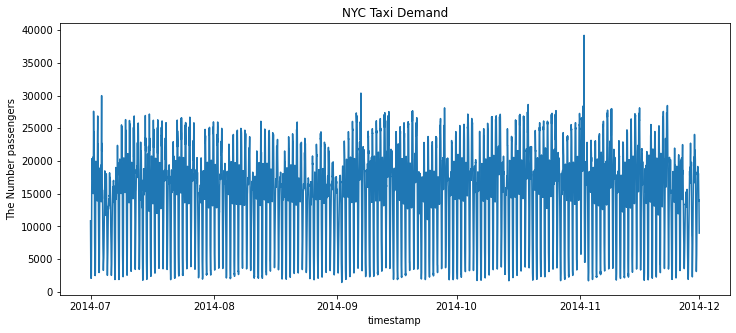

In [101]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df.iloc[0:7344]['timestamp'], df.iloc[0:7344]['value'])
ax.set_title('NYC Taxi Demand')
plt.xlabel('timestamp')
plt.ylabel('The Number passengers')
plt.show()

<AxesSubplot:xlabel='timestamp'>

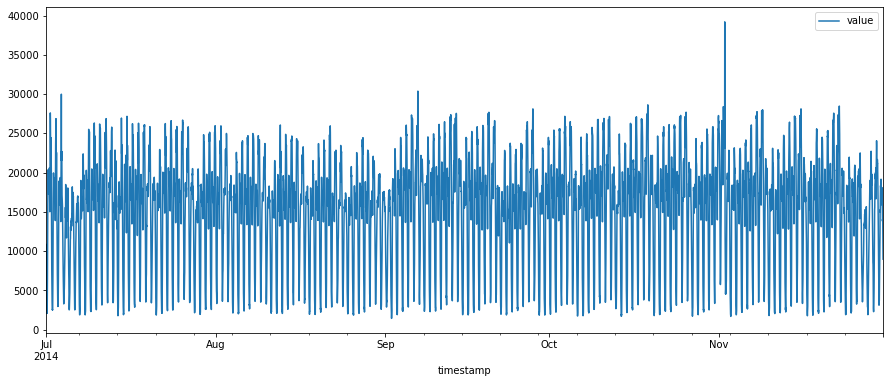

In [102]:
# Plotting a sample of the data
# July, 2014 ~ November 2014
df.iloc[0:7344,:].plot(y='value', x='timestamp', figsize=(15,6))

In [103]:
df.shape

(10320, 6)

<AxesSubplot:xlabel='timestamp'>

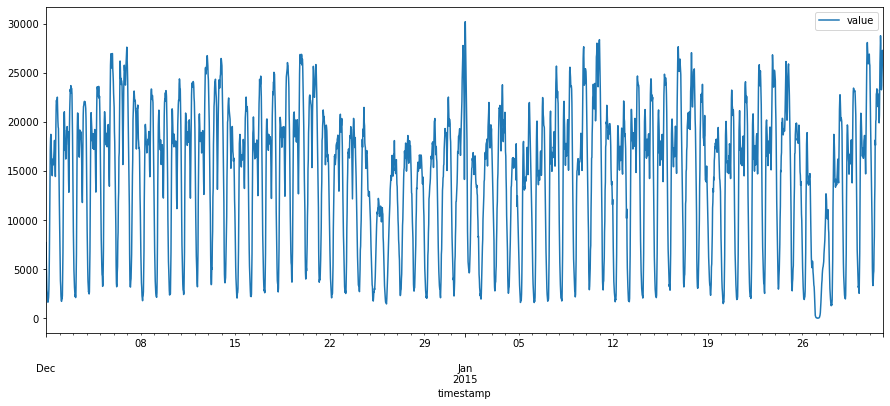

In [104]:
# Plotting a sample of the data
# December, 2014 ~ January 201
df.iloc[7344:10320,:].plot(y='value', x='timestamp', figsize=(15,6))

<AxesSubplot:xlabel='timestamp'>

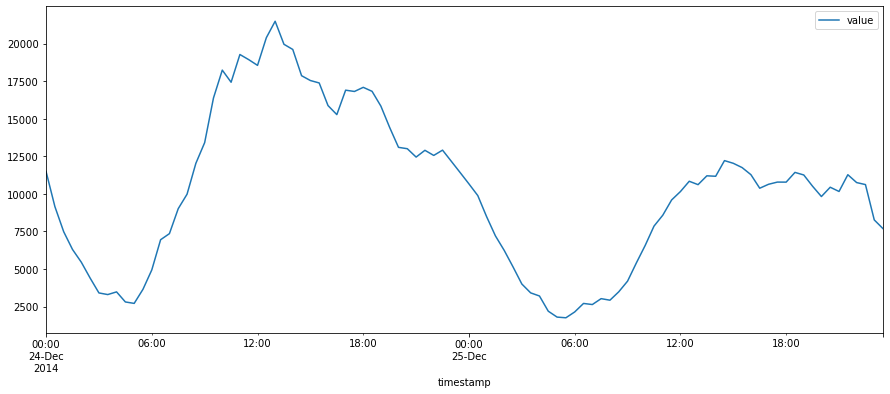

In [105]:
# December 24 ~ December 25
df.iloc[8448:8544,:].plot(y='value', x='timestamp', figsize=(15,6))

In [106]:
# Number of readings per day
df[(df['Day'] == 1) & (df['Month'] == 7) & (df['Year'] == 2014)]

,timestamp,value,Year,Month,Day,Hour
0,2014-07-01 00:00:00,10844,2014,7,1,0
1,2014-07-01 00:30:00,8127,2014,7,1,0
2,2014-07-01 01:00:00,6210,2014,7,1,1
3,2014-07-01 01:30:00,4656,2014,7,1,1
4,2014-07-01 02:00:00,3820,2014,7,1,2
5,2014-07-01 02:30:00,2873,2014,7,1,2
6,2014-07-01 03:00:00,2369,2014,7,1,3
7,2014-07-01 03:30:00,2064,2014,7,1,3
8,2014-07-01 04:00:00,2221,2014,7,1,4
9,2014-07-01 04:30:00,2158,2014,7,1,4


335
1 0.9706377261458453
2 0.9023178870091655
3 0.8055182249955462
4 0.694257398526485
5 0.5746667696394903
6 0.4542207039896304
7 0.3327296197778872
8 0.2127196216478474
9 0.09530320794460945
10 -0.013527866420423947
11 -0.11001826925889063
12 -0.1907412240322613
13 -0.25257200552650166
14 -0.2952179118652125
15 -0.3186137642145864
16 -0.325007263795198
17 -0.3159321009869103
18 -0.29470010494480187
19 -0.2645271039778238
20 -0.2312084470726554
21 -0.19855926654772382
22 -0.17229774254081853
23 -0.153802569676953
24 -0.14437725209369962
25 -0.14408470869171847
26 -0.15294377472174867
27 -0.16985395948418586
28 -0.19312013627846084
29 -0.2181159265674318
30 -0.24228318501439713
31 -0.26075147142212296
32 -0.2711694981440751
33 -0.27053943523070895
34 -0.25689905190319107
35 -0.22747733614248897
36 -0.1820312993950233
37 -0.12030522251101236
38 -0.04478449349098297
39 0.0414837770155374
40 0.135267157298845
41 0.2317709333415402
42 0.3303756808800361
43 0.42922350929955616
44 0.52891445

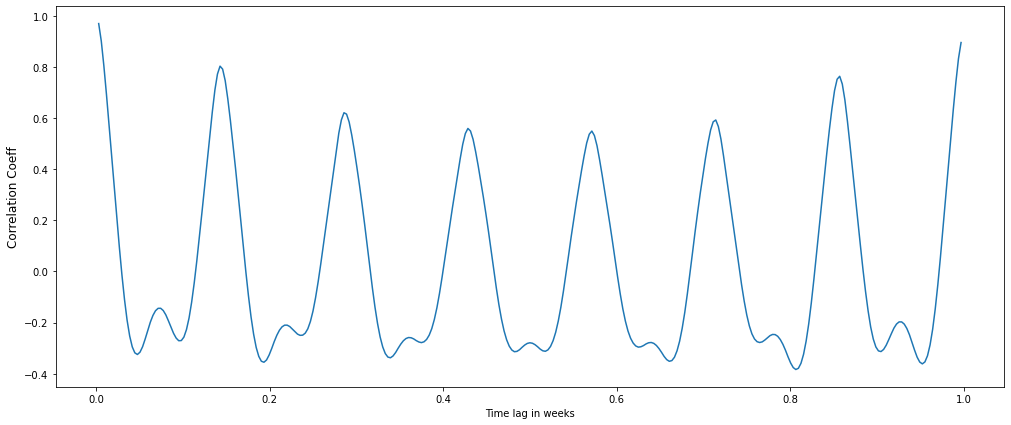

In [145]:
# Autocorrelation in timeseries (Weeks)
# The correlation coefficient is a measure of the linear correlation between two variables.
# 48 read per day per 7 days a week
timeLags = np.arange(1,48*7)
print(len(timeLags))
max_lag = None
autoCorr = []
# autoCorr = [df.value.autocorr(lag=dt) for dt in timeLags]
for dt in timeLags:
    dt_auto_corr = df.value.autocorr(lag=dt)
    autoCorr.append(dt_auto_corr)
    if max_lag == None or dt_auto_corr > max_lag[1]:
        max_lag = (dt, dt_auto_corr)
    print(dt,dt_auto_corr)
print(max(autoCorr), max_lag)
plt.figure(figsize=(17,7))
plt.plot(1.0/(48*7)*timeLags, autoCorr);
plt.xlabel('Time lag in weeks'); plt.ylabel('Correlation Coeff', fontsize=12);

# Featurization 

We have created new columns from timestamp. We can also generate additional new features from the timestamp. 
- (1) Adding day of a week in addition to the day of a month
- (2) The average of rides per a particular hour for the same day of the week. 
- (3) Number of rides during the day and during the night.

In [108]:
# (1) Adding day of the week.
df['Weekday'] = df.timestamp.dt.weekday

In [109]:
df.head(3)

,timestamp,value,Year,Month,Day,Hour,Weekday
0,2014-07-01 00:00:00,10844,2014,7,1,0,1
1,2014-07-01 00:30:00,8127,2014,7,1,0,1
2,2014-07-01 01:00:00,6210,2014,7,1,1,1


In [110]:
# (2) Adding the average of rides grouped by the weekday and hour
# 7 Days, 24 Hours = 168 values
len(df[:7344].groupby(df.Weekday.astype(str) + ' ' + df.Hour.astype(str))['value'].mean().to_dict())

168

In [111]:
df['avg_hour_day'] = df.Weekday.astype(str) + ' ' + df.Hour.astype(str)
df.head(3)

,timestamp,value,Year,Month,Day,Hour,Weekday,avg_hour_day
0,2014-07-01 00:00:00,10844,2014,7,1,0,1,1 0
1,2014-07-01 00:30:00,8127,2014,7,1,0,1,1 0
2,2014-07-01 01:00:00,6210,2014,7,1,1,1,1 1


In [112]:
df.avg_hour_day = df.avg_hour_day.replace(df[:7344].groupby(df.Weekday.astype(str) + ' ' + df.Hour.astype(str))['value'].mean().to_dict())
df.head(10)

,timestamp,value,Year,Month,Day,Hour,Weekday,avg_hour_day
0,2014-07-01 00:00:00,10844,2014,7,1,0,1,8764.000000
1,2014-07-01 00:30:00,8127,2014,7,1,0,1,8764.000000
2,2014-07-01 01:00:00,6210,2014,7,1,1,1,5185.272727
3,2014-07-01 01:30:00,4656,2014,7,1,1,1,5185.272727
4,2014-07-01 02:00:00,3820,2014,7,1,2,1,3112.181818
5,2014-07-01 02:30:00,2873,2014,7,1,2,1,3112.181818
6,2014-07-01 03:00:00,2369,2014,7,1,3,1,2075.431818
7,2014-07-01 03:30:00,2064,2014,7,1,3,1,2075.431818
8,2014-07-01 04:00:00,2221,2014,7,1,4,1,2083.613636
9,2014-07-01 04:30:00,2158,2014,7,1,4,1,2083.613636


In [113]:
# (3) Featuring the number of rides during the day and during the night.
# We define the day time to be any hours between 6 AM and 10 PM while Night time where usually there is less 
# demand is any time between 10:00 PM and 6:00 AM
df['day_time'] = ((df['Hour'] >= 6) & (df['Hour'] <= 22)).astype(int)

In [114]:
df.head()

,timestamp,value,Year,Month,Day,Hour,Weekday,avg_hour_day,day_time
0,2014-07-01 00:00:00,10844,2014,7,1,0,1,8764.000000,0
1,2014-07-01 00:30:00,8127,2014,7,1,0,1,8764.000000,0
2,2014-07-01 01:00:00,6210,2014,7,1,1,1,5185.272727,0
3,2014-07-01 01:30:00,4656,2014,7,1,1,1,5185.272727,0
4,2014-07-01 02:00:00,3820,2014,7,1,2,1,3112.181818,0


<AxesSubplot:ylabel='value'>

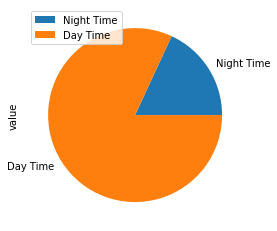

In [115]:
df.groupby(['day_time']).sum().plot(kind='pie', y='value', labels=['Night Time', 'Day Time']) 

/home/matteo/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.
/home/matteo/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



Text(0, 0.5, 'Frequency')

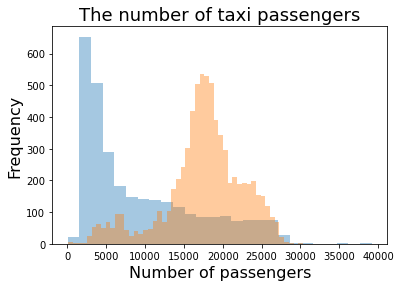

In [116]:
sns.distplot(df.loc[df['day_time'] == 0]['value'], kde = False)
sns.distplot(df.loc[df['day_time'] == 1]['value'], kde = False);
plt.title('The number of taxi passengers', fontsize=18)
plt.xlabel('Number of passengers', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

### Data Preperation 

In [117]:
df.head(3)

,timestamp,value,Year,Month,Day,Hour,Weekday,avg_hour_day,day_time
0,2014-07-01 00:00:00,10844,2014,7,1,0,1,8764.000000,0
1,2014-07-01 00:30:00,8127,2014,7,1,0,1,8764.000000,0
2,2014-07-01 01:00:00,6210,2014,7,1,1,1,5185.272727,0


In [118]:
# Normalizing the values
standard_scaler = preprocessing.StandardScaler()
scaled_data = standard_scaler.fit_transform(df[['Hour', 'day_time', 'Weekday', 'avg_hour_day', 'value']])

In [119]:
scaled_df = df.copy()

In [120]:
scaled_df['Hour'] = scaled_data[:,0]
scaled_df['day_time'] = scaled_data[:,1]
scaled_df['Weekday'] = scaled_data[:,2]
scaled_df['avg_hour_day'] = scaled_data[:,3]
scaled_df['value'] = scaled_data[:,4]
scaled_df.head(3)

,timestamp,value,Year,Month,Day,Hour,Weekday,avg_hour_day,day_time
0,2014-07-01 00:00:00,-0.618745,2014,7,1,-1.661325,-1.005865,-1.002380,-1.558387
1,2014-07-01 00:30:00,-1.010291,2014,7,1,-1.661325,-1.005865,-1.002380,-1.558387
2,2014-07-01 01:00:00,-1.286549,2014,7,1,-1.516862,-1.005865,-1.546894,-1.558387


In [121]:
# Specifying how many values to predict
time_step = 1 

### Splitting the dataset

In [122]:
training_size = int(len(scaled_df) * 0.9)
training, testing = scaled_df[0:training_size], scaled_df[training_size:len(df)]
print('Size of the dataset: %d' % (len(scaled_df)))
print('Training examples: %d' % (len(training)))
print('Testing examples: %d' % (len(testing)))

Size of the dataset: 10320
Training examples: 9288
Testing examples: 1032


In [123]:
# training features: Value, Hour, day_time
X_train = training[['value', 'Hour', 'day_time']].to_numpy()
y_train = scaled_df[time_step:testing.index[0]]['value'].to_numpy()

In [124]:
# testing data
X_test = testing[0:-time_step][['value', 'Hour', 'day_time']].to_numpy()
y_test = scaled_df[testing.index[0] + time_step:]['value'].to_numpy()

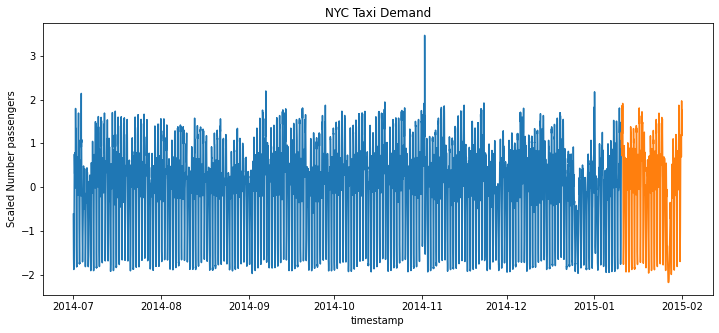

In [125]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(training['timestamp'], X_train[:,0])
ax.plot(testing['timestamp'][0:-1], X_test[:,0])
ax.set_title('NYC Taxi Demand')
plt.xlabel('timestamp')
plt.ylabel('Scaled Number passengers')
plt.show()

### Creating the data sequence 

In [126]:
y_train

array([-1.01029084, -1.28654908, -1.51049551, ...,  0.53067386,
        0.6817008 ,  1.06142978])

In [127]:
y_train[-X_train.shape[0]:]

array([-1.01029084, -1.28654908, -1.51049551, ...,  0.53067386,
        0.6817008 ,  1.06142978])

In [128]:
# create sequences of (48-two readings per hour) data points for each training example
def create_sequence(dataset, length):
    data_sequences = []
    for index in range(len(dataset) - length):
        data_sequences.append(dataset[index: index + length])
    return np.asarray(data_sequences)

In [129]:
X_train = create_sequence(X_train, 48)
X_test  = create_sequence(X_test, 48)
y_train = y_train[-X_train.shape[0]:]
y_test  = y_test[-X_test.shape[0]:]

In [130]:
y_train[0]

-0.2547238406089097

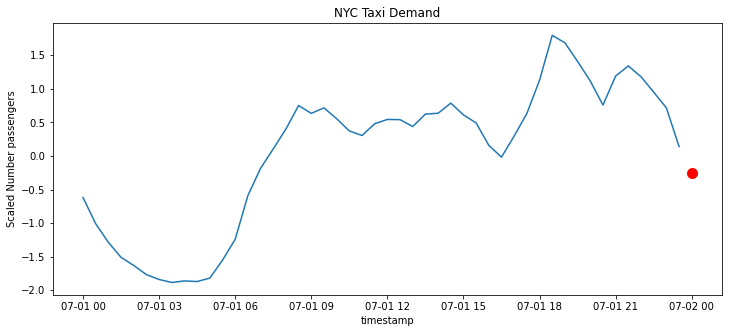

In [131]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(training[0:48]['timestamp'], X_train[0,:,0])
ax.scatter(training[48:49]['timestamp'], y_train[0], color='red', linewidth=5.0)
ax.set_title('NYC Taxi Demand')
plt.xlabel('timestamp')
plt.ylabel('Scaled Number passengers')
plt.show()

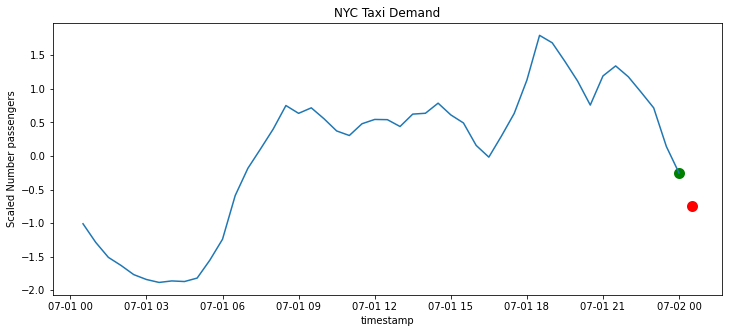

In [132]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(training[1:49]['timestamp'], X_train[1,:,0])
ax.scatter(training[48:49]['timestamp'], y_train[0], color='green', linewidth=5.0)
ax.scatter(training[49:50]['timestamp'], y_train[1], color='red', linewidth=5.0)
ax.set_title('NYC Taxi Demand')
plt.xlabel('timestamp')
plt.ylabel('Scaled Number passengers')
plt.show()

In [133]:
print("X_train shape={}, and y_train shape={}".format(X_train.shape, y_train.shape))
print("X_test shape={}, and y_test shape={}".format(X_test.shape, y_test.shape))

X_train shape=(9240, 48, 3), and y_train shape=(9240,)
X_test shape=(983, 48, 3), and y_test shape=(983,)


## Model Building 

In [134]:
# Building the model
model = Sequential()
# Adding a Bidirectional LSTM layer
model.add(Bidirectional(LSTM(64,return_sequences=True, dropout=0.5, input_shape=(X_train.shape[1], X_train.shape[-1]))))
model.add(Bidirectional(LSTM(20, dropout=0.5)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='rmsprop')

In [135]:
# Training the model
model.fit(X_train, y_train, batch_size=128, epochs=50)

Epoch 1/50


2022-10-30 13:28:13.959845: E tensorflow/stream_executor/cuda/cuda_dnn.cc:373] Could not create cudnn handle: CUDNN_STATUS_INTERNAL_ERROR
2022-10-30 13:28:13.959877: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at cudnn_rnn_ops.cc:1553 : UNKNOWN: Fail to find the dnn implementation.


UnknownError: Graph execution error:

Fail to find the dnn implementation.
	 [[{{node CudnnRNN}}]]
	 [[sequential_2/bidirectional_4/forward_lstm_4/PartitionedCall]] [Op:__inference_train_function_33451]

In [ ]:
model.summary()

### Evaluation

In [ ]:
# create the list of difference between prediction and test data
predictions = model.predict(X_test)
len(predictions)

In [ ]:
def evaluate_predictions(predictions, y_test, outliers):
    ratio = []
    differences = []
    for pred in range(len(y_test)):
        ratio.append((y_test[pred]/predictions[pred])-1)
        differences.append(abs(y_test[pred]- predictions[pred]))
    
    
    n_outliers = int(len(differences) * outliers)
    outliers = pd.Series(differences).astype(float).nlargest(n_outliers)
    
    return ratio, differences, outliers

In [ ]:
ratio, differences, outliers = evaluate_predictions(predictions, y_test, 0.01)

In [ ]:
for index in outliers.index: 
    outliers[index] = predictions[index]
outliers

In [ ]:
# Showing the predicted vs. actual values
fig, axs = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(15)

axs.plot(predictions,color='red', label='Predicted')
axs.plot(y_test,color='blue', label='Actual')
axs.scatter(outliers.index,outliers, color='green', linewidth=5.0, label='Anomalies')
plt.xlabel('Timestamp')
plt.ylabel('Scaled number of passengers')
plt.legend(loc='upper left')
plt.show()